# Cover figure for GitHub .README

In [1]:
import pygmt

In [6]:
pygmt.grdfilter(grid='../data/main_results/Ross_Embayment_basement_filt.nc', 
                filter='g80000', 
                nans='i', distance='0', 
                outgrid='../data/results/Ross_Embayment_basement_filt_buffer.nc')

# create mask to clip grids to within the RIS
!gmt grdmath ../data/main_results/Ross_Embayment_basement_filt.nc ISNAN = ../data/tmp/RE_mask.nc
!gmt grdmath ../data/tmp/RE_mask.nc 0 NAN = ../data/tmp/RE_mask.nc
!gmt grdmath -Df ../data/results/BedMachine_bed_5k_wgs.nc ../data/tmp/RE_mask.nc MUL = ../data/results/BedMachine_bed_5k_wgs_noRIS.nc
!gmt grdblend ../data/results/Ross_Embayment_basement_filt_buffer.nc ../data/results/BedMachine_bed_5k_wgs_noRIS.nc -G../data/results/Basement_merged_bed.nc

In [7]:
# create mask to clip grids to within the RIS
!gmt grdmask ../data/shapefiles/RIS_tight_outline.shp -G../data/tmp/RIS_tight_mask.nc -I5000+e -R-3330000/1900000/-3330000/1850000 -rp -NNaN/1/1
!gmt grdmath -Df ../data/results/BedMachine_surface_5k_wgs.nc ../data/tmp/RIS_tight_mask.nc MUL = ../data/results/BedMachine_surface_5k_wgs_RIS.nc
!gmt grdmath -Df ../data/results/BedMachine_icebase_5k_wgs.nc ../data/tmp/RIS_tight_mask.nc MUL = ../data/results/BedMachine_icebase_5k_wgs_RIS.nc
!gmt grdmath -Df ../data/results/BedMachine_bed_5k_wgs.nc ../data/tmp/RIS_tight_mask.nc MUL = ../data/results/BedMachine_bed_5k_wgs_RIS.nc
!gmt grdmath -Df ../data/main_results/RIS_basement_filt.nc ../data/tmp/RIS_tight_mask.nc MUL = ../data/results/RIS_basement_filt_tight.nc

## Figure parameters

In [8]:
# set our PyGMT figure parameters, 
# we will use an Antarctic Polar Stereographic projection (EPSG3031)
# set the region of our figure, in meters from the South Pole
e_lim= -660_000
n_lim= -1_400_000
w_lim= 470_000
s_lim= -400_000

fig_height=180 # in mm

# calculate figure width and map scale
fig_width=fig_height*(w_lim-e_lim)/(s_lim-n_lim)
fig_ratio = (s_lim - n_lim) / (fig_height/1000)

# Make a GMT region string and projection strings in both ESPG3031 and Lat/Lon
fig_reg = str(e_lim) + '/' + str(w_lim) + '/' + str(n_lim) + '/' + str(s_lim)
fig_proj = "x1:" + str(fig_ratio)
fig_proj_ll = "s0/-90/-71/1:" + str(fig_ratio)

buffer=10e3
buffer_reg = str(e_lim+buffer) + '/' + str(w_lim-buffer) + '/' + str(n_lim+buffer) + '/' + str(s_lim-buffer)

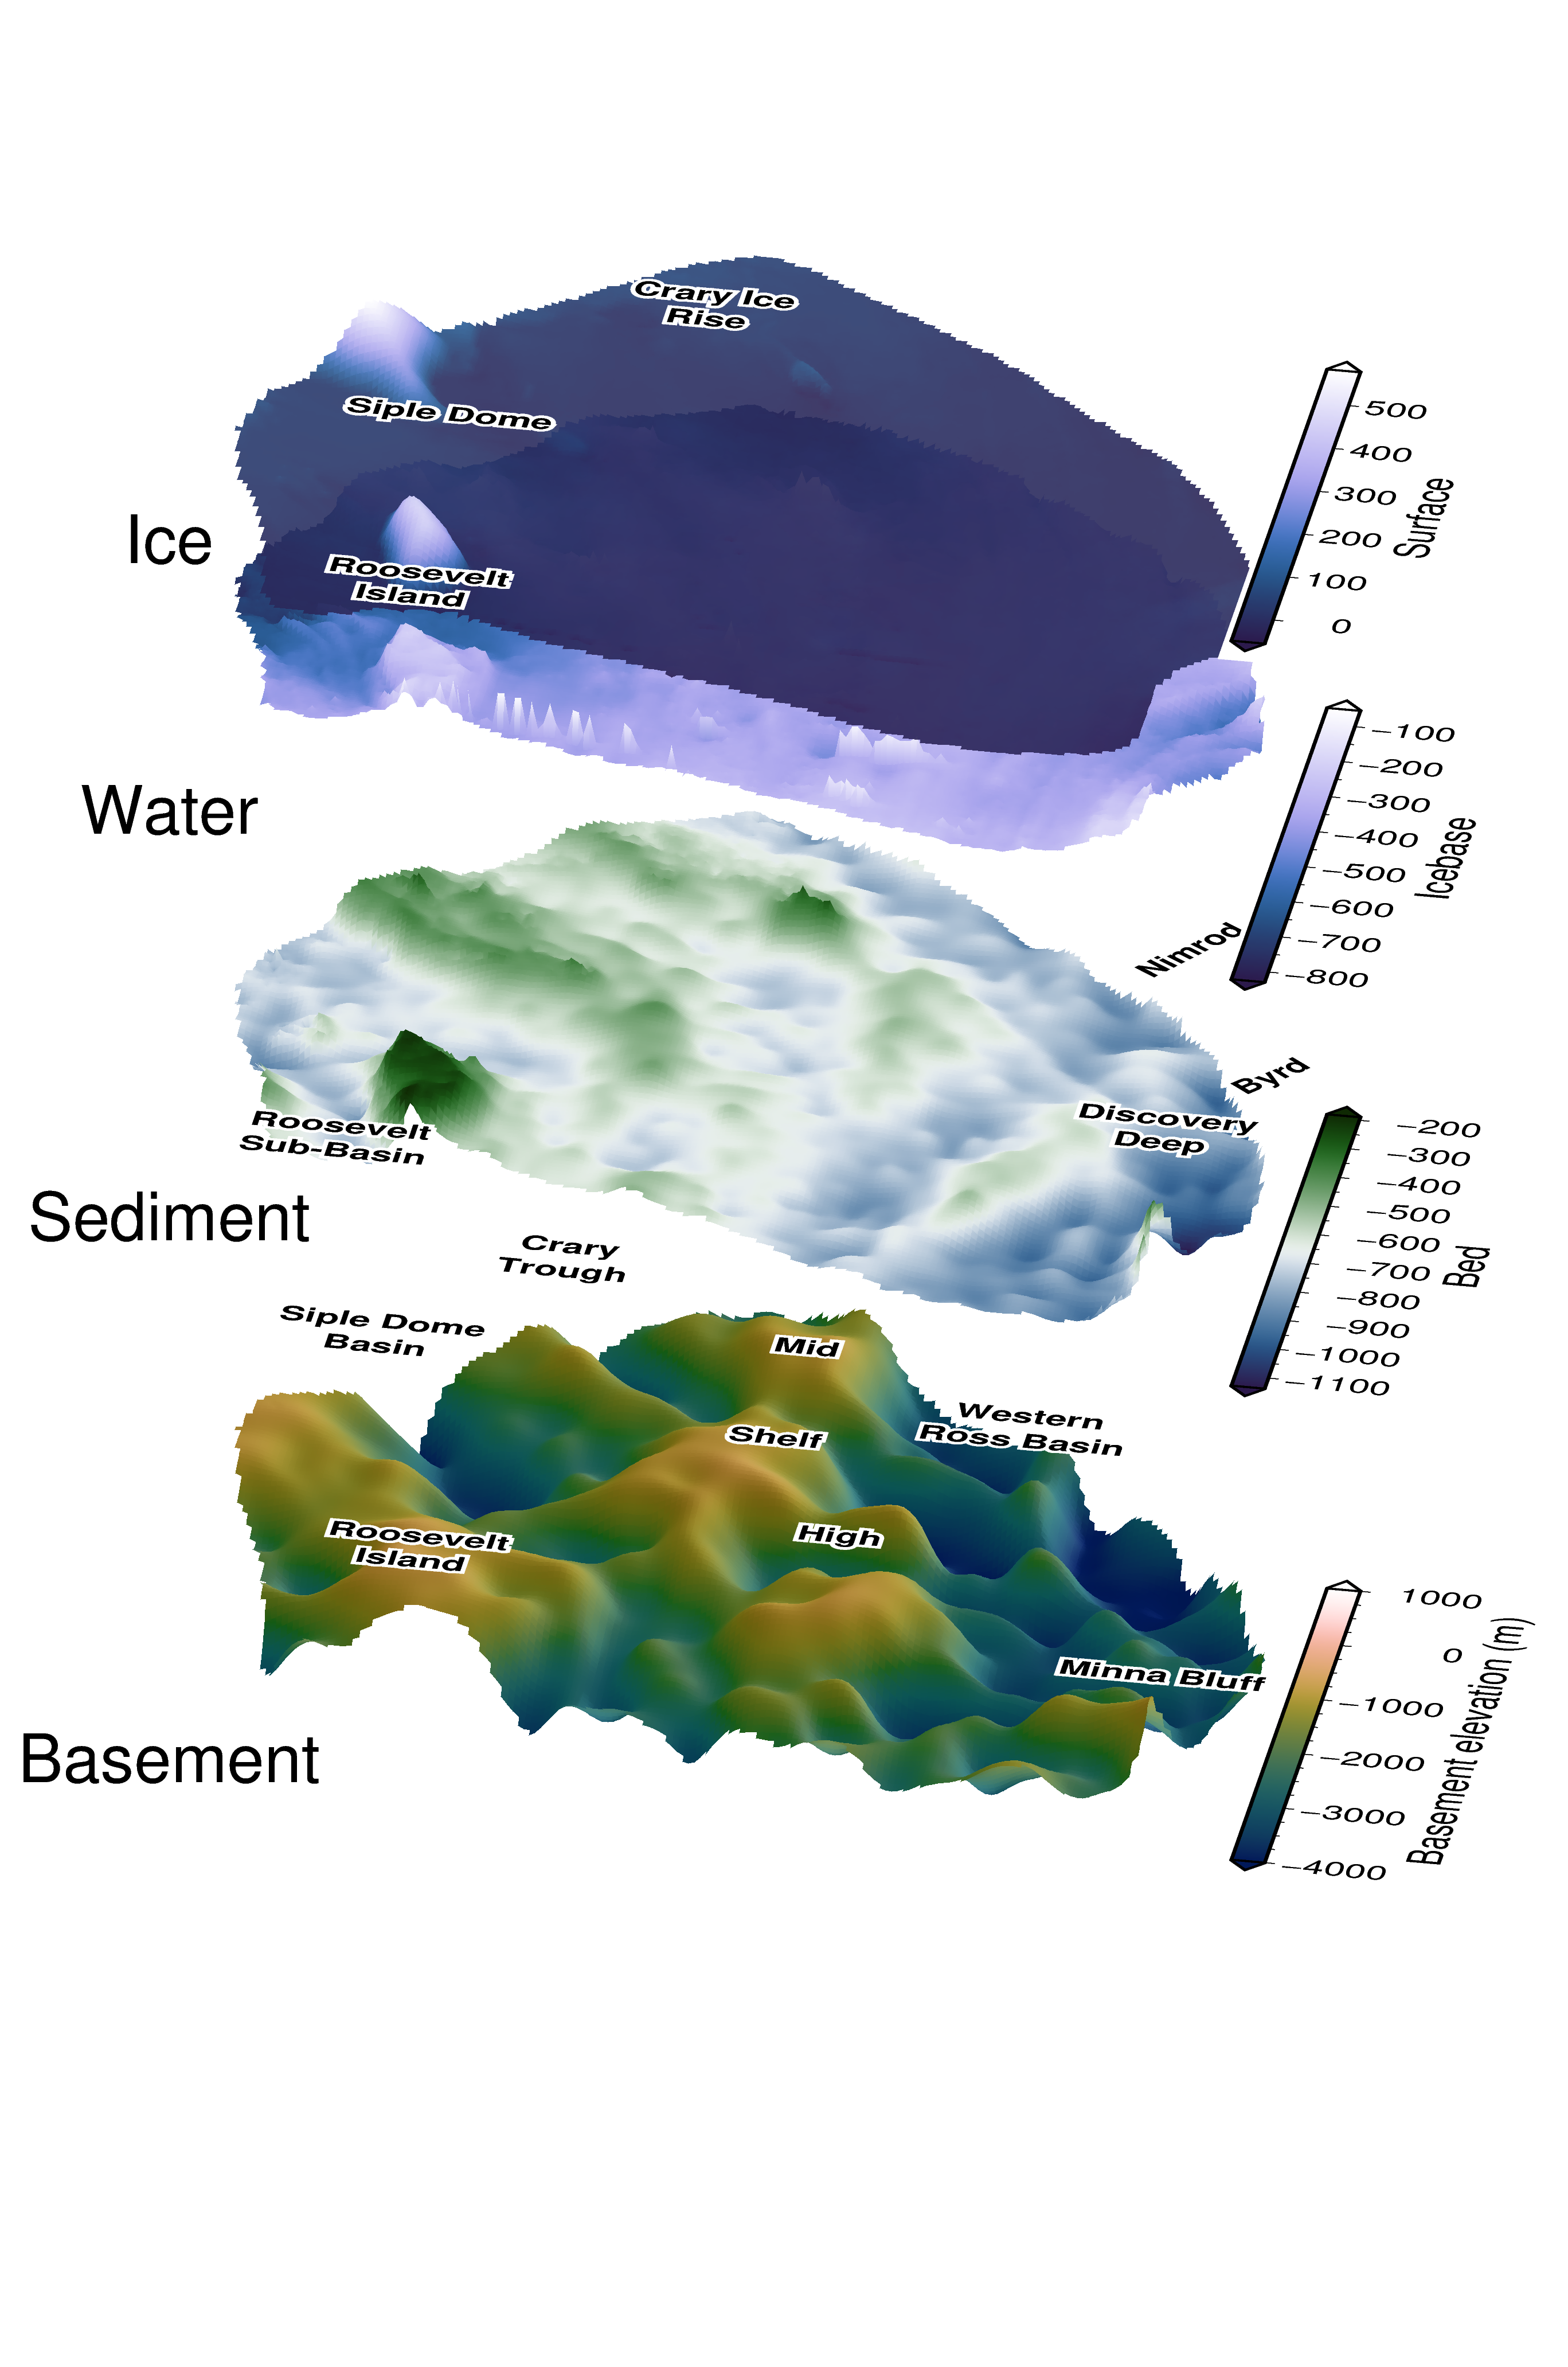

In [9]:
# set perspective view: azimuth, angle
view= [170,30]

fig = pygmt.Figure()
persp_reg=fig_reg+'/-10000/1000'

grid = '../data/results/RIS_basement_filt_tight.nc'
# grid of basement merged to bed outside of RIS area
# grid = '../data/results/Basement_merged_bed.nc'

# make basement color ramp
pygmt.makecpt(cmap='batlowW', series="-4000/1000")
# plot basement
fig.grdview(region=persp_reg, projection=fig_proj, frame=None, grid=grid, 
    perspective=view, zsize="7c",  surftype="c", #plane='-9000+ggrey',
    shading='grdgradient+a45+ne.5+m-.2', cmap=True)   

# plot location labels, with white shadow
text="../data/plotting/place_labels_cover_fig_base.tsv"
fig.text(textfiles=text, perspective=True, angle=True, font='16p,Helvetica-Bold,black,-=4p,white',
         justify=True, no_clip=True)
fig.text(textfiles=text, perspective=True, angle=True, font='16p,Helvetica-Bold,black',
         justify=True, no_clip=True)

# plot layer label
text='Sediment'
fig.shift_origin(yshift='5c', xshift='2.5c')
fig.text(position='ML',text=text, font='28p,Helvetica,black', fill='white', justify='MC', no_clip=True)
fig.shift_origin(yshift='-5c', xshift='-2.5c')

# plot layer label
text='Basement'
fig.shift_origin(yshift='-3c', xshift='2.5c')
fig.text(position='ML',text=text, font='28p,Helvetica,black', fill='white', justify='MC', no_clip=True)
fig.shift_origin(yshift='3c', xshift='-2.5c')

# plot colorbar
frame = 'xa1000f250+l"Basement elevation (m)"'
bar_width = fig_width/10 * 0.4 # color bar width is 80% of the map width, in cm
pos_str = 'jMR+w' + str(bar_width) + 'c/.5c+v+e+m'
fig.shift_origin(yshift='2c', xshift='-2c')
with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
    fig.colorbar(perspective=True, position=pos_str,
                  cmap = True, box = '+gwhite+c3p',
                  frame = frame, verbose='e')
fig.shift_origin(yshift='-2c', xshift='2c')
# to have cbar along front instead of side
# bar_width = fig_width/10 * 0.4 # color bar width is 80% of the map width, in cm
# pos_str = 'jBC+w' + str(bar_width) + 'c/1c+h+e+m'
# with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black', 
#               MAP_ANNOT_OFFSET_PRIMARY = '2p', MAP_TICK_PEN_PRIMARY = '1p,black', 
#               MAP_TICK_LENGTH_PRIMARY = '3p', MAP_FRAME_PEN = '0.5p,black', MAP_LABEL_OFFSET = '4p'):
#     fig.colorbar(perspective=True, 
#                 cmap = True,
#                 position = pos_str,
#                 frame = frame, 
#                 verbose='e')
    
    
# plot the grounding/coast lines
# pygmt.grdtrack(grid = grid, region=buffer_reg,
#                points = '../data/shapefiles/GroundingLine_Antarctica_v02.shp',
#                outfile="../data/tmp/GL.txt",)
# pygmt.grdtrack(grid = grid, region=buffer_reg,
#                points = '../data/shapefiles/CoastLine_Antarctica_v02.shp',
#                outfile="../data/tmp/CL.txt",)
# fig.plot3d(region=persp_reg, data='../data/tmp/GL.txt', 
#          pen='0.5p,black', perspective=True,
#          verbose='e', no_clip=False)
# fig.plot3d(region=persp_reg, data='../data/tmp/CL.txt', 
#          pen='0.5p,black', perspective=True,
#          verbose='e', no_clip=False)   
 
###########
###########
###########    
fig.shift_origin(yshift='-3c')
###########
###########
###########

grid = '../data/results/BedMachine_bed_5k_wgs_RIS.nc'

#plot bed
fig.grdview(region=persp_reg, projection=fig_proj, frame=None,
    grid=grid, perspective=view,zsize="20c", surftype="c",
    # shading='grdgradient+a45+ne.5+m-.2',        
    cmap='cork',transparency=0)

# plot location labels, with white shadow
text="../data/plotting/place_labels_cover_fig_bed.tsv"
fig.text(textfiles=text, perspective=True, angle=True, font='16p,Helvetica-Bold,black,-=4p,white',
         justify=True, no_clip=True)
fig.text(textfiles=text, perspective=True, angle=True, font='16p,Helvetica-Bold,black',
         justify=True, no_clip=True)

# plot layer label
text='Water'
fig.shift_origin(yshift='14c', xshift='2.5c')
fig.text(position='ML',text=text, font='28p,Helvetica,black', fill='white', justify='MC', no_clip=True)
fig.shift_origin(yshift='-14c', xshift='-2.5c')

# plot colorbar
bar_width = fig_width/10 * 0.4 # color bar width is 80% of the map width, in cm
pos_str = 'jMR+w' + str(bar_width) + 'c/.5c+v+e+m'
frame = 'xa100f50+l"Bed"'
fig.shift_origin(yshift='12c', xshift='-2c')
with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
    fig.colorbar(perspective=True, position=pos_str,
                  cmap = True, box = '+gwhite+c3p',
                  frame = frame, verbose='e')
fig.shift_origin(yshift='-12c', xshift='2c')

###########
###########
###########
fig.shift_origin(yshift='6c')
###########
###########
###########

grid = '../data/results/BedMachine_icebase_5k_wgs_RIS.nc'

# plot icebase
fig.grdview(region=persp_reg, 
    projection=fig_proj,
    frame=None,
    grid=grid,
    perspective=view,
    zsize="20c",
    surftype="c",
    cmap='devon',)

# plot layer label
text='Ice'
fig.shift_origin(yshift='12c', xshift='2.5c')
fig.text(position='ML',text=text, font='28p,Helvetica,black', fill='white', justify='MC', no_clip=True)
fig.shift_origin(yshift='-12c', xshift='-2.5c')

# plot colorbar 
frame = 'xa100f50+l"Icebase"'
fig.shift_origin(yshift='12c', xshift='-2c')
with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
    fig.colorbar(perspective=True, position=pos_str,
                  cmap = True, box = '+gwhite+c3p',
                  frame = frame, verbose='e')
fig.shift_origin(yshift='-12c', xshift='2c')
###########
###########
###########    
fig.shift_origin(yshift='1c')
###########
###########
###########

grid = '../data/results/BedMachine_surface_5k_wgs_RIS.nc'
# pygmt.makecpt(cmap='devon', series='-100/400', background=True, output='../data/plotting/surface.cpt')

# plot surface
fig.grdview(region=persp_reg, 
    projection=fig_proj,
    frame=None,
    grid=grid,
    perspective=view,
    zsize="20c",
    surftype="c",
    cmap='devon', 
    transparency=10)

# plot location labels, with white shadow
text="../data/plotting/place_labels_cover_fig_surface.tsv"
fig.text(textfiles=text, perspective=True, angle=True, font='16p,Helvetica-Bold,black,-=4p,white',
         justify=True, no_clip=True)
fig.text(textfiles=text, perspective=True, angle=True, font='16p,Helvetica-Bold,black',
         justify=True, no_clip=True)

# plot colorbar
frame = 'xa100f00+l"Surface"'
fig.shift_origin(yshift='16c', xshift='-2c')
with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
    fig.colorbar(perspective=True, position=pos_str, cmap = True, 
                 box = '+gwhite+c3p', frame = frame, verbose='e')
fig.shift_origin(yshift='-16c', xshift='2c')
fig.show()

In [10]:
out='outputs/cover_fig.png'
fig.savefig(out, dpi=400, transparent=True)